# IMPORTING LIBRARIES


In [1]:
import pandas as pd    

import numpy as np

import seaborn as sns       #Importin seabor library for interactive visualization

import matplotlib.pyplot as plt    #Importing pyplot interface using matplotlib

from sklearn.preprocessing import StandardScaler    #Importing StandardScaler using sklearn library

from sklearn.model_selection import train_test_split   #To split the data in training and testing part  

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score   #To generate classification report and acuracy score 


---------

 # Data Acquisition & Description

In [2]:
# Importing Dataset.
credit_card = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

In [3]:
# Printing the number of rows and columns of a dataset as well as Dataset.
print('Shape of our Dataset -',credit_card.shape)
credit_card

Shape of our Dataset - (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [4]:
# Gives a summary of the dataset including column names, data types, non-null values, and memory usage.
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
# Returns the data type of each feature of a dataset.
credit_card.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# Displays the first five rows of a dataset.  
credit_card.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
# Displays the last five rows of  dataset.
credit_card.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [8]:
# Returns a list of column names in the dataset.
credit_card.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#Gives descriptive statistics of a dataset. 
credit_card.describe().round(3)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,...,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.000,568630.0
mean,284314.500,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,12041.958,0.5
std,164149.486,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,6919.644,0.5
min,0.000,-3.496,-49.967,-3.184,-4.951,-9.953,-21.111,-4.352,-10.756,-3.752,...,-19.383,-7.735,-30.295,-4.068,-13.613,-8.227,-10.499,-39.035,50.010,0.0
25%,142157.250,-0.565,-0.487,-0.649,-0.656,-0.293,-0.446,-0.284,-0.192,-0.569,...,-0.166,-0.490,-0.238,-0.652,-0.554,-0.632,-0.305,-0.232,6054.892,0.0
50%,284314.500,-0.094,-0.136,0.000,-0.074,0.081,0.079,0.233,-0.115,0.093,...,-0.037,-0.027,-0.060,0.016,-0.008,-0.012,-0.173,-0.014,12030.150,0.5
75%,426471.750,0.833,0.344,0.629,0.707,0.440,0.498,0.526,0.047,0.559,...,0.148,0.464,0.156,0.701,0.550,0.673,0.334,0.410,18036.330,1.0
max,568629.000,2.229,4.362,14.126,3.202,42.717,26.168,217.873,5.958,20.270,...,8.087,12.633,31.708,12.966,14.622,5.623,113.231,77.256,24039.930,1.0


In [10]:
credit_card['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [11]:
print("********* Amount Lost due to fraud:************\n")
print("Total amount lost to fraud")
print(credit_card.Amount[credit_card.Class == 1].sum())
print("Mean amount per fraudulent transaction")
print(credit_card.Amount[credit_card.Class == 1].mean().round(4))
print("Compare to normal transactions:")
print("Total amount from normal transactions")
print(credit_card.Amount[credit_card.Class == 0].sum())
print("Mean amount per normal transactions")
print(credit_card.Amount[credit_card.Class == 0].mean().round(4))

********* Amount Lost due to fraud:************

Total amount lost to fraud
3428157045.3500004
Mean amount per fraudulent transaction
12057.6018
Compare to normal transactions:
Total amount from normal transactions
3419261324.3999996
Mean amount per normal transactions
12026.3135


### Observations
###### ⪼  We have 568630 Rows of observations having 31 columns.
###### ⪼  'Class' is our Output feature indicating whether the transaction is "Fraudulent" (1) or "Not Fraudulent" (0).
###### ⪼  "V1-V28"Anonymized features representing various transaction attributes.
###### ⪼  dtype(data type) of all the features looks perfect.

-------------

# DATA PREPROCESSING

In [12]:
# Checking null values in the dataset
print(credit_card.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
# Checking duplicate values in the dataset
credit_card.duplicated().any()

False

### Observations
##### ⪼ No missing values.
##### ⪼ No duplicates.

------------------

# EDA (Exploratory Data Analysis)

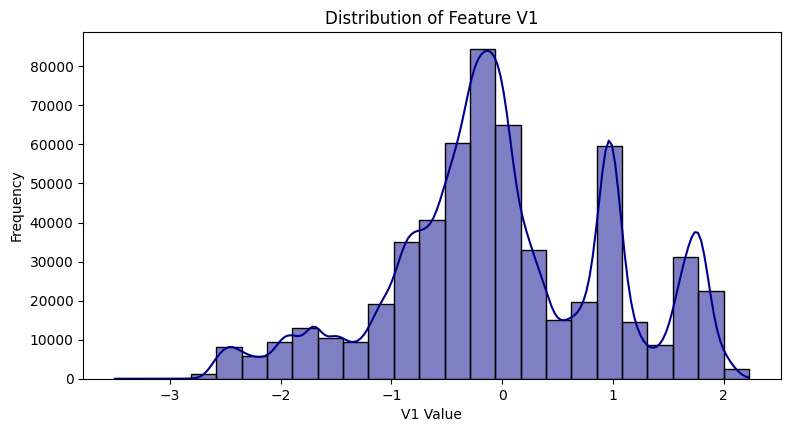

In [14]:
# Observing the Distribution of Feature V1
plt.figure(figsize=(9, 4.5))
sns.histplot(credit_card['V1'], bins=25, kde=True, color='darkblue')
plt.title('Distribution of Feature V1')
plt.xlabel('V1 Value')
plt.ylabel('Frequency')
plt.show()

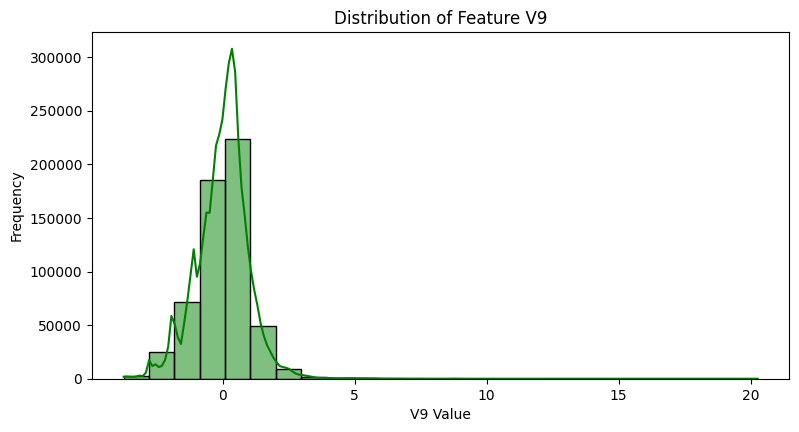

In [15]:
# Observing the Distribution of Feature V9
plt.figure(figsize=(9, 4.5))
sns.histplot(credit_card['V9'], bins=25, kde=True, color='green')
plt.title('Distribution of Feature V9')
plt.xlabel('V9 Value')
plt.ylabel('Frequency')
plt.show()

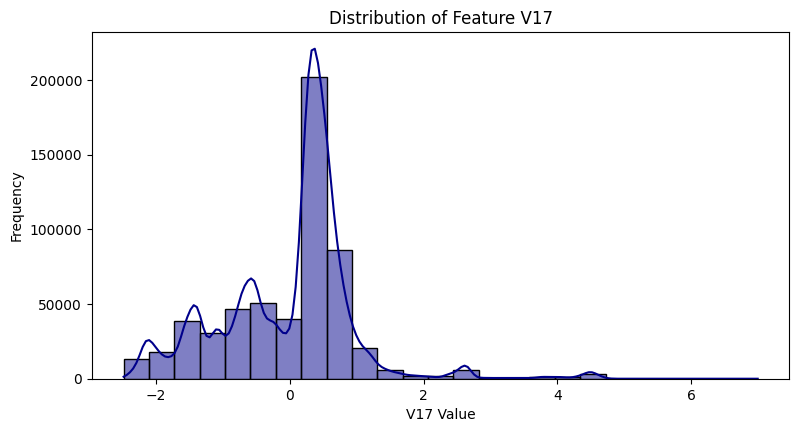

In [16]:
# Observing the Distribution of Feature V17
plt.figure(figsize=(9, 4.5))
sns.histplot(credit_card['V17'], bins=25, kde=True, color='darkblue')
plt.title('Distribution of Feature V17')
plt.xlabel('V17 Value')
plt.ylabel('Frequency')
plt.show()

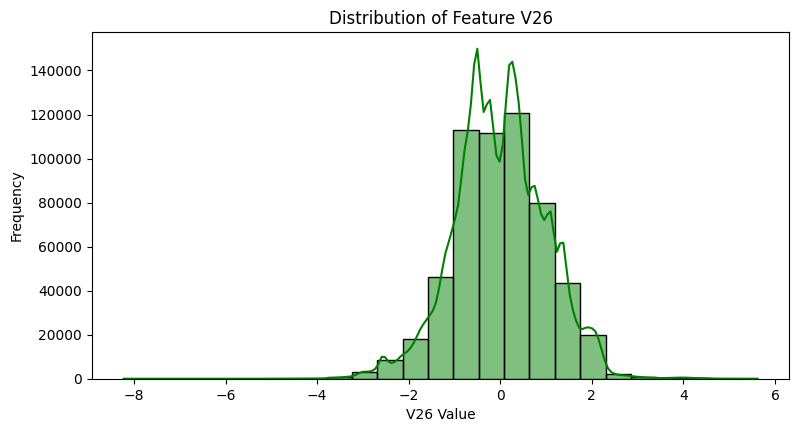

In [17]:
# Observing the Distribution of Feature V26
plt.figure(figsize=(9, 4.5))
sns.histplot(credit_card['V26'], bins=25, kde=True, color='green')
plt.title('Distribution of Feature V26')
plt.xlabel('V26 Value')
plt.ylabel('Frequency')
plt.show()

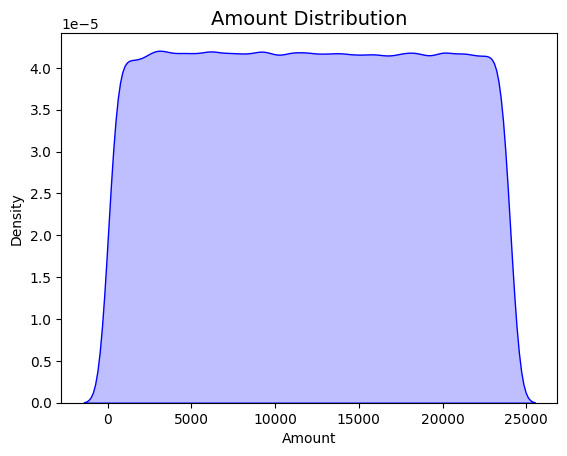

In [18]:
# Observing the Amount Disribution 
sns.kdeplot(data= credit_card['Amount'],color = 'blue', fill=True)
plt.title('Amount Distribution',size=14)
plt.show()

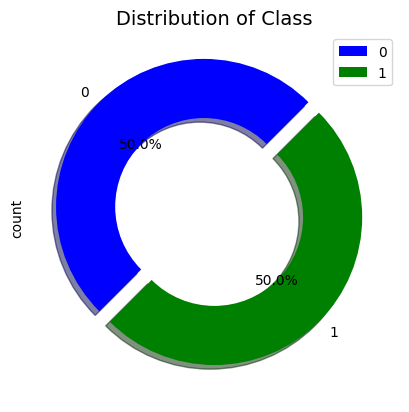

In [19]:
# Observing the Disribution of the Feature 'Class'
colors = ['blue', 'green']
explode = [0.1, 0]
credit_card['Class'].value_counts().plot.pie(
    explode=explode,
    autopct='%3.1f%%',
    shadow=True,
    legend=True,
    startangle=45,
    colors=colors,  
    wedgeprops=dict(width=0.4) 
)

plt.title('Distribution of Class',size=14)
plt.show()

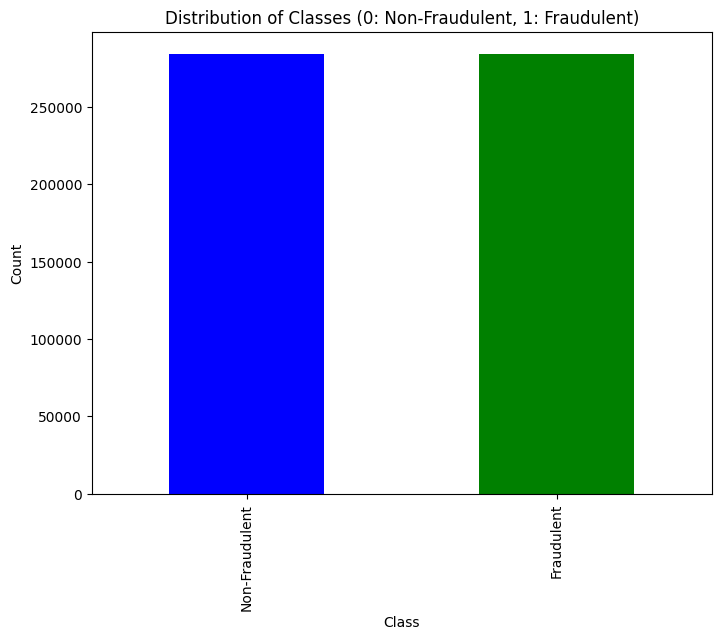

In [20]:
# Observing the Disribution of the Feature 'Class'
plt.figure(figsize=(8, 6))
credit_card['Class'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Classes (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [21]:
# Pulling the highest correlated feature to the feature 'Class'
corrmat = credit_card.corr()
cols = corrmat.nlargest(15,'Class')['Class'].index
cols

Index(['Class', 'id', 'V4', 'V11', 'V2', 'V19', 'V27', 'V20', 'V8', 'V21',
       'V28', 'V26', 'V25', 'V22', 'V23'],
      dtype='object')

In [22]:
# Pulling the least correlated feature to the feature 'Class'
cols_negative = corrmat.nsmallest(15,'Class')['Class'].index
cols_negative

Index(['V14', 'V12', 'V3', 'V10', 'V9', 'V16', 'V1', 'V7', 'V17', 'V6', 'V18',
       'V5', 'V24', 'V13', 'V15'],
      dtype='object')

In [23]:
# Joining the two above variables in one variable 'Credit_card'
Credit_card = []
for i in cols:
    Credit_card.append (i)
for j in cols_negative:
    Credit_card.append(j)

Credit_card

['Class',
 'id',
 'V4',
 'V11',
 'V2',
 'V19',
 'V27',
 'V20',
 'V8',
 'V21',
 'V28',
 'V26',
 'V25',
 'V22',
 'V23',
 'V14',
 'V12',
 'V3',
 'V10',
 'V9',
 'V16',
 'V1',
 'V7',
 'V17',
 'V6',
 'V18',
 'V5',
 'V24',
 'V13',
 'V15']

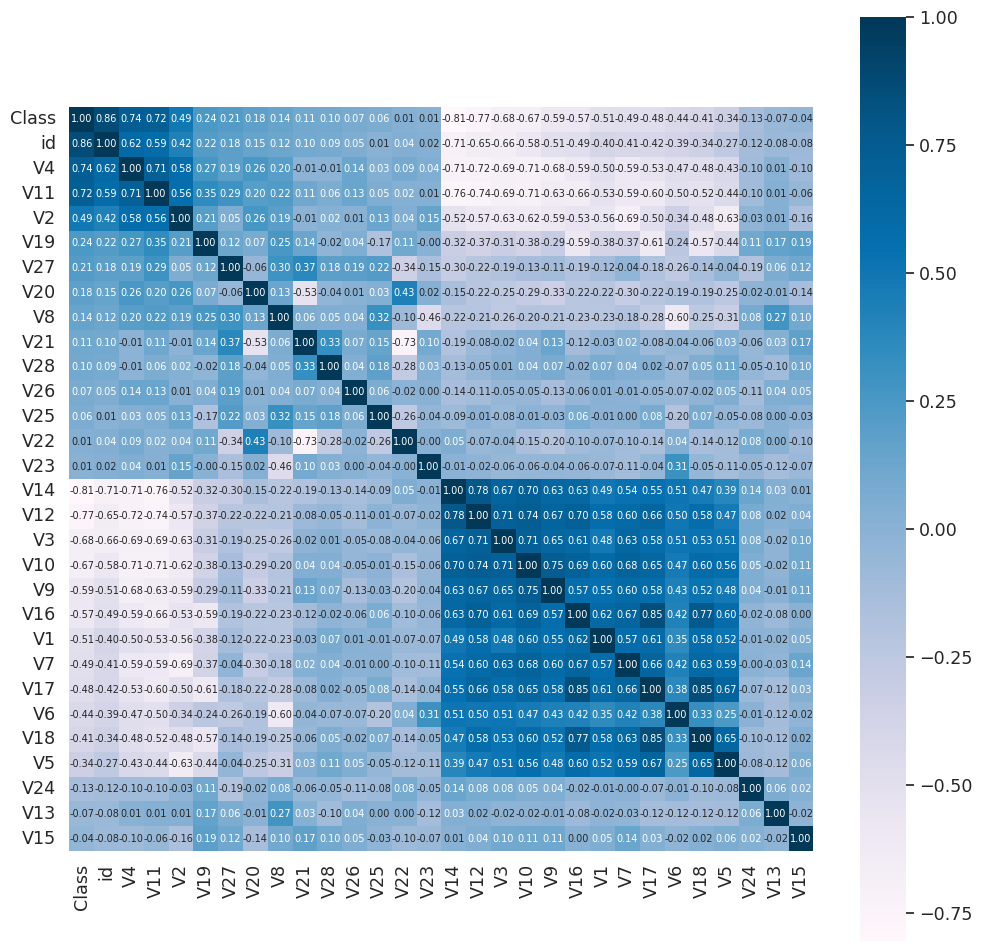

In [24]:
# Observing the Correlation between features using a heatmap
corrmat = credit_card[Credit_card].corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(corrmat,
                 cmap='PuBu',
                 cbar=True, 
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 7},
                 yticklabels=corrmat.columns,
                 xticklabels=corrmat.columns)

-------------

# SPLIT DATA INTO TEST AND TRAIN

In [25]:
# Split the data into features (X) and target (y).
x = credit_card.drop(['id','Class'],axis=1)
y = credit_card.Class

In [26]:
# Standardize the feature data (x)   
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)

[[-0.2606478  -0.46964845  2.49626608 ... -0.08123011 -0.15104549
   0.85844694]
 [ 0.98509973 -0.35604509  0.55805635 ... -0.24805206 -0.06451192
  -0.79636931]
 [-0.26027161 -0.94938461  1.72853778 ... -0.30025804 -0.24471823
  -1.37701093]
 ...
 [-0.31199739 -0.00409479  0.13752559 ... -0.48753975 -0.26874127
   1.66640101]
 [ 0.63687054 -0.51696952 -0.30088853 ... -0.15926926 -0.07625057
  -0.27185346]
 [-0.79514417  0.43323608 -0.64914005 ... -1.5751126   0.7229365
   1.3659619 ]]


In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

-------

# MODEL SELECTION AND TRAINING

### i) RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred_rf = rf.predict(X_test)

In [32]:
print("Randon Forest Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf)*100,"%")

Randon Forest Classifier
Confusion Matrix:
 [[56841    22]
 [    0 56863]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Accuracy Score: 99.9806552591316 %


In [33]:
RandomForestClassifier = accuracy_score(y_test, y_pred_rf)*100

### ii) Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC

In [35]:
clf = SVC()

In [36]:
clf.fit(X_train, y_train)

SVC()

In [37]:
y_pred_svm = clf.predict(X_test)

In [38]:
print("Support Vector Machine")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm)*100,"%")

Support Vector Machine
Confusion Matrix:
 [[56654   209]
 [  122 56741]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Accuracy Score: 99.70894958057085 %


In [39]:
Support_Vector_Machine = accuracy_score(y_test, y_pred_svm)*100

### iii) Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred_reg =  reg.predict(X_test)

In [43]:
print("Logistic Regression Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_reg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_reg)*100,"%")

Logistic Regression Model
Confusion Matrix:
 [[55593  1270]
 [ 2715 54148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726


Accuracy Score: 96.49596398360973 %


In [44]:
Logistic_Regression = accuracy_score(y_test, y_pred_reg)*100

### iv) Gradient Boosting Classifier (XGBoost)

In [45]:
!pip3 install xgboost

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier()

In [48]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred_xgb = xgb.predict(X_test)

In [50]:
print("XGBoost Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb)*100,'%')

XGBoost Model
Confusion Matrix:
 [[56829    34]
 [    0 56863]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Accuracy Score: 99.97010358229429 %


In [51]:
XGBoost = accuracy_score(y_test, y_pred_xgb)*100

------

# EVALUATION OF MODELS

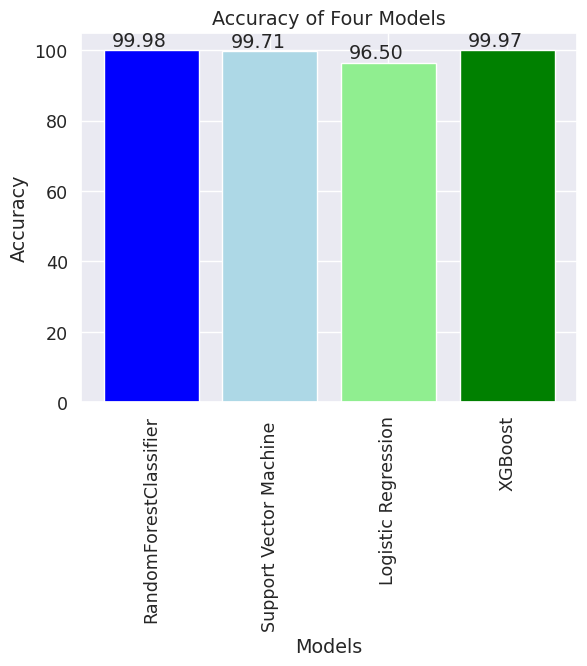

In [52]:


model_names = ['RandomForestClassifier', 'Support Vector Machine ', 'Logistic Regression', 'XGBoost']
accuracy_values = [RandomForestClassifier, Support_Vector_Machine, Logistic_Regression, XGBoost]  # Replace with your actual accuracy values

bars = plt.bar(model_names, accuracy_values, color=['blue', 'lightblue', 'lightgreen', 'green'])


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Four Models')


plt.xticks(rotation=90)


for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()


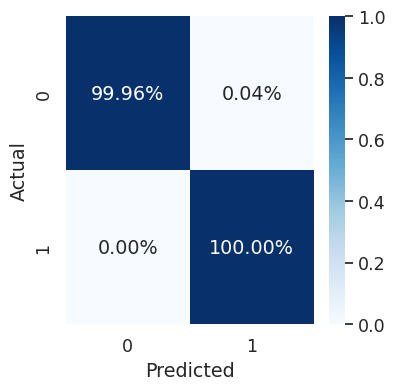

In [53]:
cm_1 = confusion_matrix(y_test, y_pred_rf)
cmn_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmn_1, annot=True, fmt='.2%', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

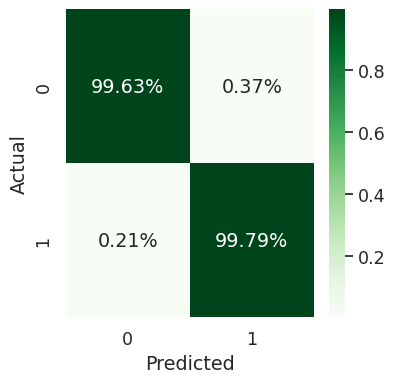

In [54]:
cm_2 = confusion_matrix(y_test, y_pred_svm)
cmn_2 = cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmn_2, annot=True, fmt='.2%', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

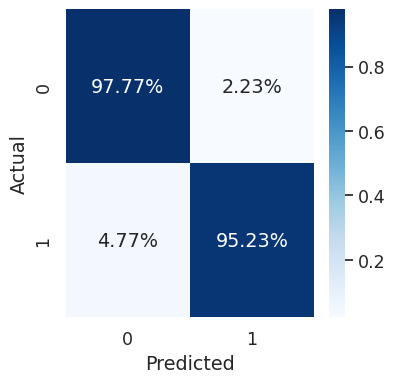

In [55]:
cm_3 = confusion_matrix(y_test, y_pred_reg)
cmn_3 = cm_3.astype('float') / cm_3.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmn_3, annot=True, fmt='.2%', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

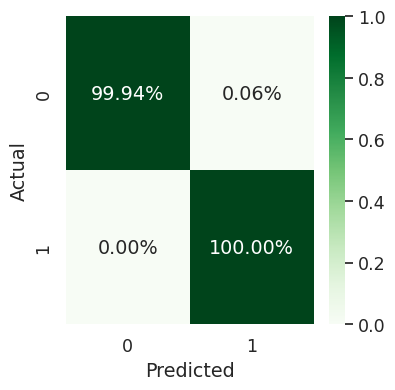

In [56]:
cm_4 = confusion_matrix(y_test, y_pred_xgb)
cmn_4 = cm_4.astype('float') / cm_4.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmn_4, annot=True, fmt='.2%', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)